# Histograms, Binnings, Density

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

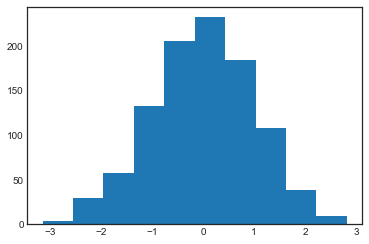

In [5]:
plt.hist(data);

## Tuning of parameters

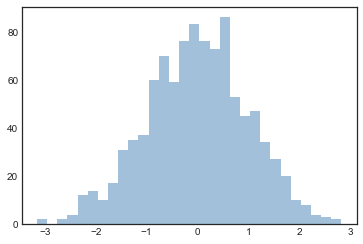

In [9]:
plt.hist(data, bins=30, alpha=0.5, histtype="stepfilled", color="steelblue", edgecolor="none");

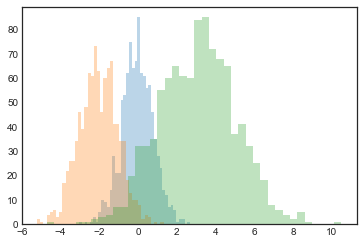

In [14]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype="stepfilled", alpha=0.3, bins=40)
plt.hist(x1, **kwargs);
plt.hist(x2, **kwargs);
plt.hist(x3, **kwargs);

Just counting the number of points in bin -> ``np.histogram()``

In [18]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 34 190 437 292  47]


## Two Dimensional Histograms and Binnings
- We start with defining some data (x, y) and draw an multivariant gaussian from there

In [20]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d`` Two dimensional histogram

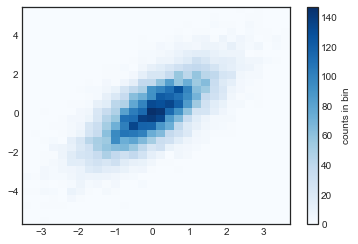

In [22]:
plt.hist2d(x, y, bins=30, cmap="Blues");
cb = plt.colorbar()
cb.set_label("counts in bin");

## Kernel density estimation

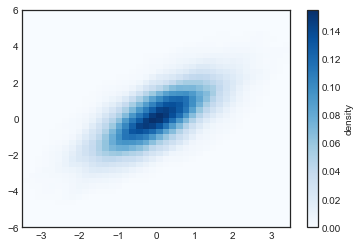

In [29]:
from scipy.stats import gaussian_kde

# fit an array of size
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, YGrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), YGrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin="lower", aspect="auto", extent=[-3.5, 3.5, -6, 6], cmap="Blues");
cb = plt.colorbar();
cb.set_label("density");